In [33]:
import os
import pydub
import matplotlib.pyplot as plt

In [2]:
voice_1 = pydub.AudioSegment.from_file("raw_data/Mohammad.ogg")

In [3]:
voice_1

In [5]:
voice_1.export("Mohammad.mp3")

<_io.BufferedRandom name='Mohammad.mp3'>

In [6]:
voice_1 = pydub.AudioSegment.from_file("raw_data/Khadijeh_1.ogg")
voice_2 = pydub.AudioSegment.from_file("raw_data/Khadijeh_2.ogg")

result = voice_1 + voice_2

result.export("data/Khadijeh.ogg")

<_io.BufferedRandom name='data/Khadijeh.ogg'>

In [11]:
voice_1 = pydub.AudioSegment.from_file("raw_data/morteza_1.m4a")
voice_2 = pydub.AudioSegment.from_file("raw_data/morteza_2.m4a")

result = voice_1 + voice_2

result.export("data/Morteza.ogg")

<_io.BufferedRandom name='data/Morteza.ogg'>

In [12]:
voice_1 = pydub.AudioSegment.from_file("raw_data/zahra.opus")

voice_1.export("data/Zahra.ogg")

<_io.BufferedRandom name='data/Zahra.ogg'>

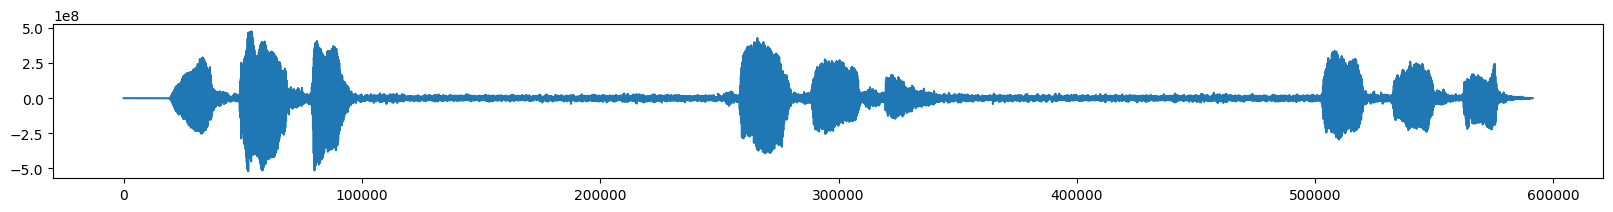

In [28]:
voice_1 = pydub.AudioSegment.from_file("data/sajjad.ogg")
voice_2 = voice_1.get_array_of_samples()

plt.figure(figsize=(20, 2))
plt.plot(voice_2)
plt.show()

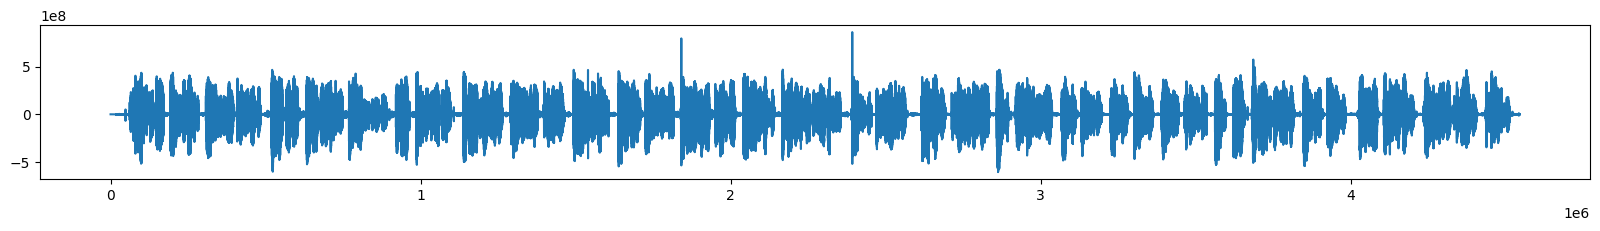

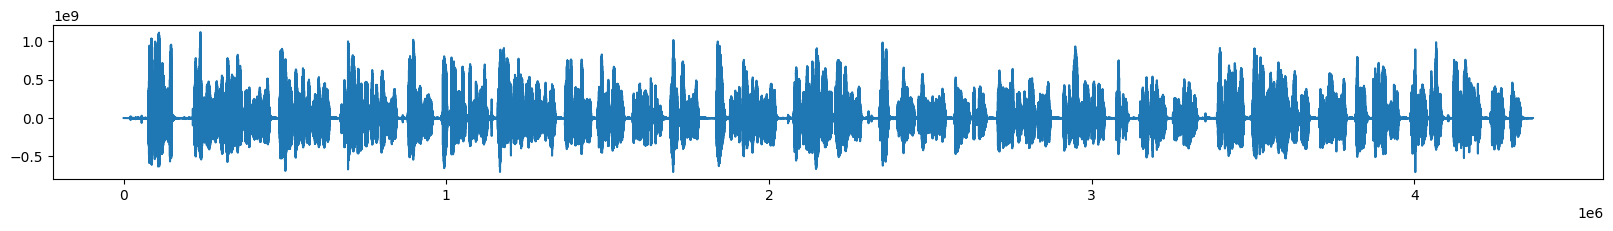

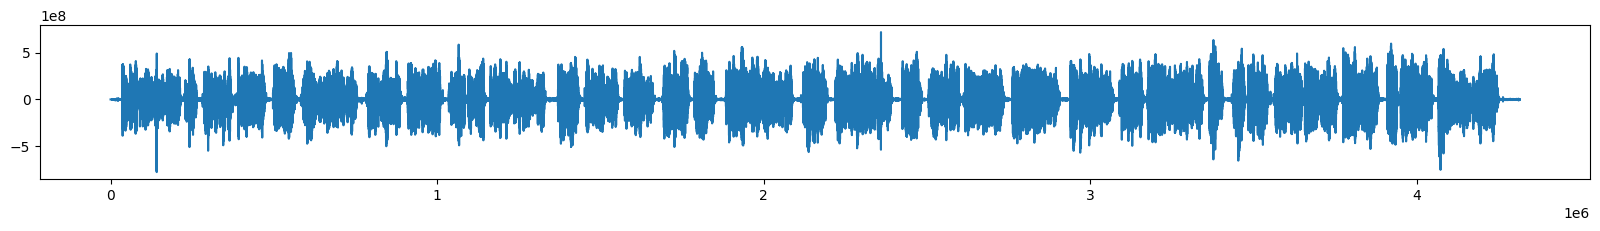

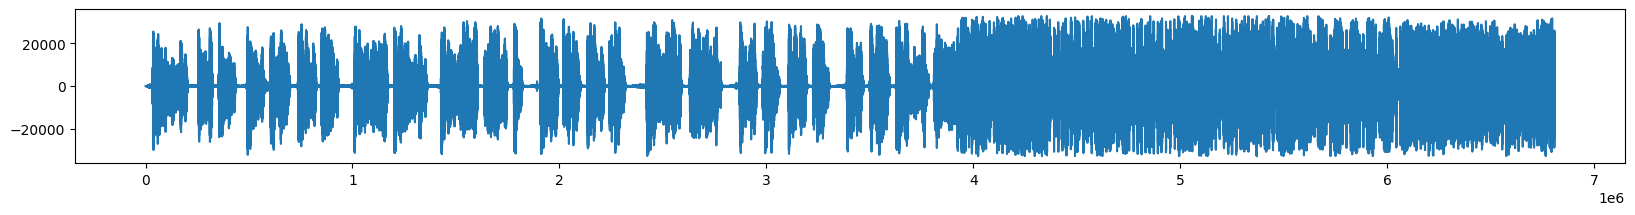

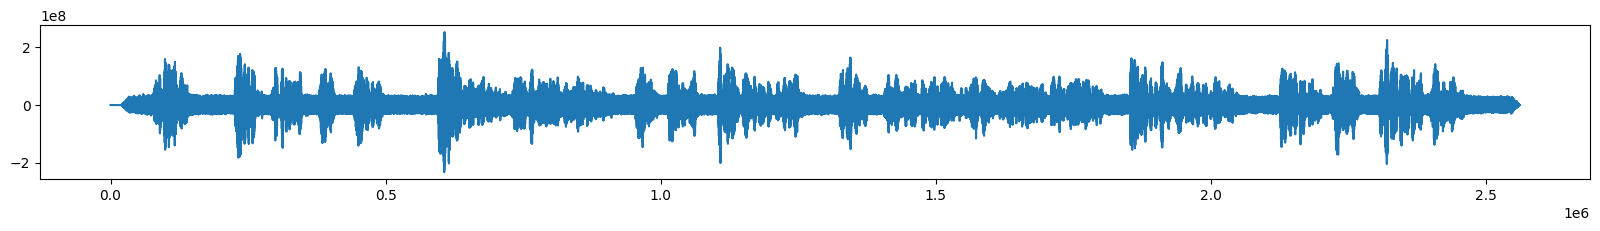

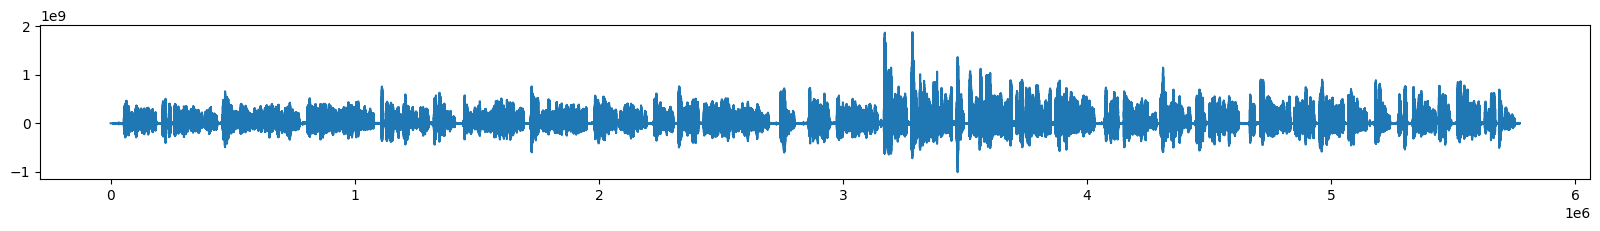

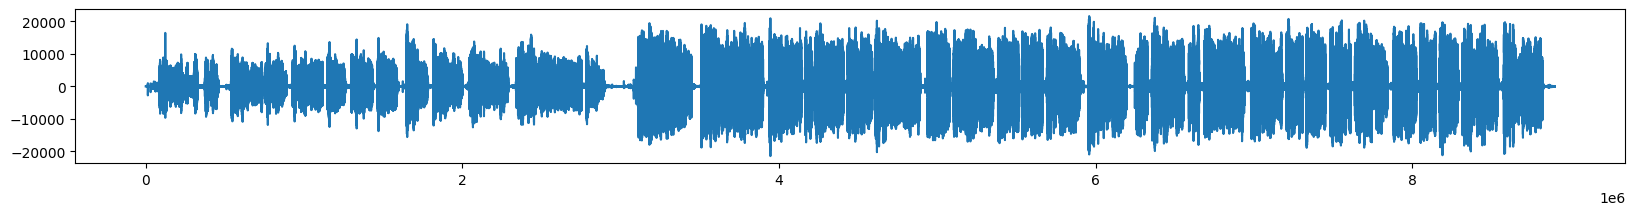

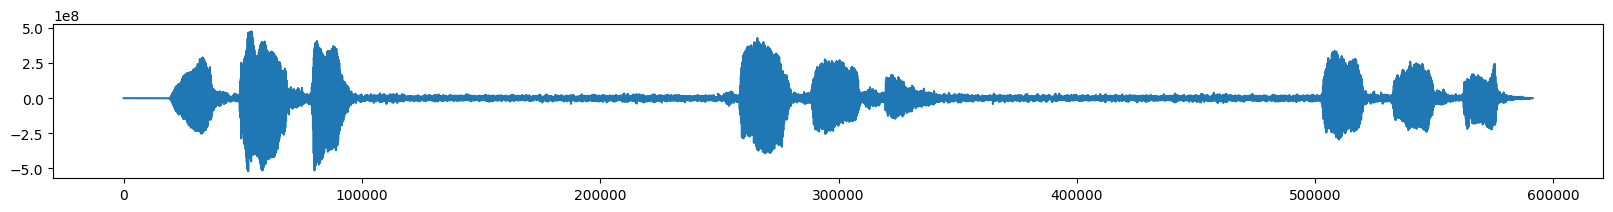

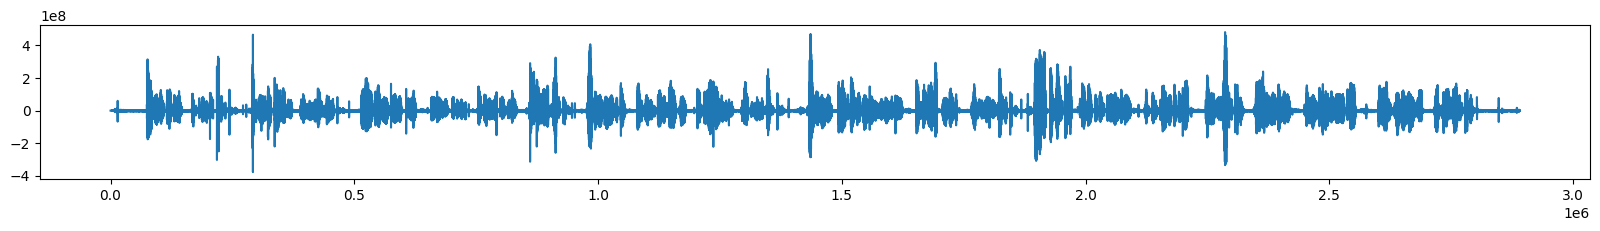

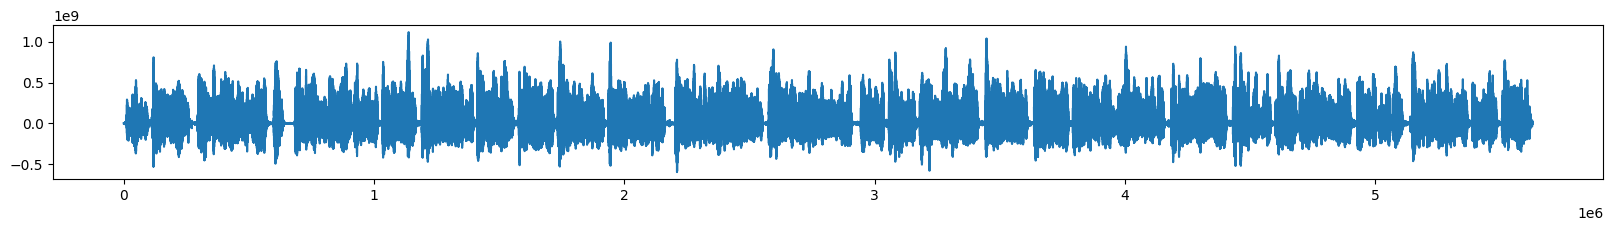

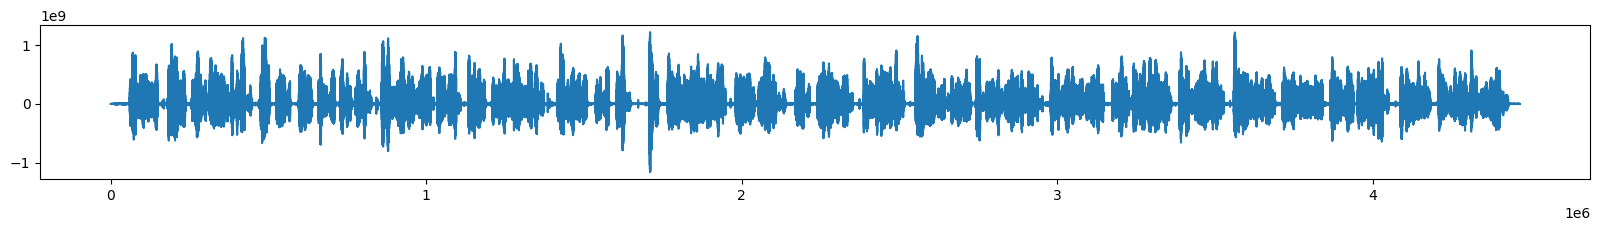

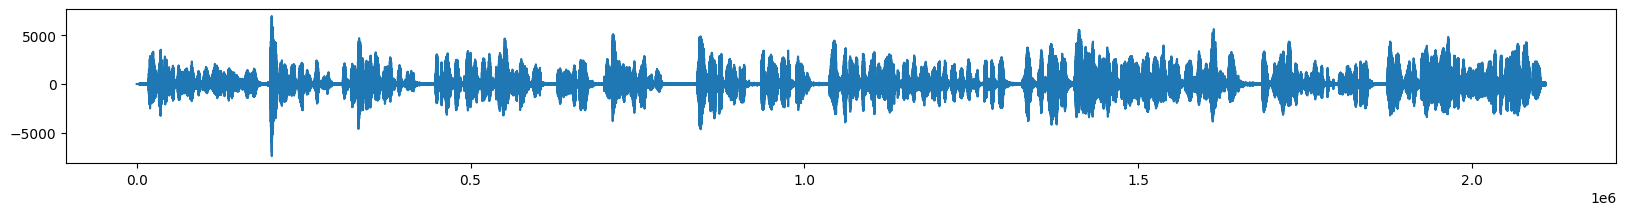

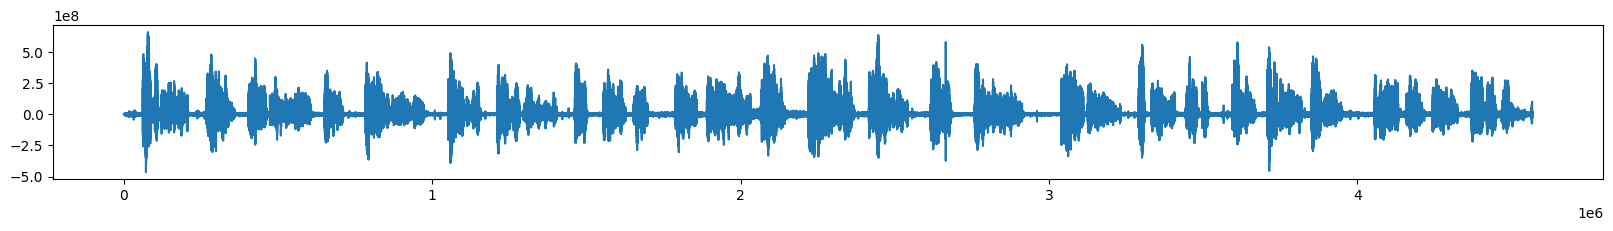

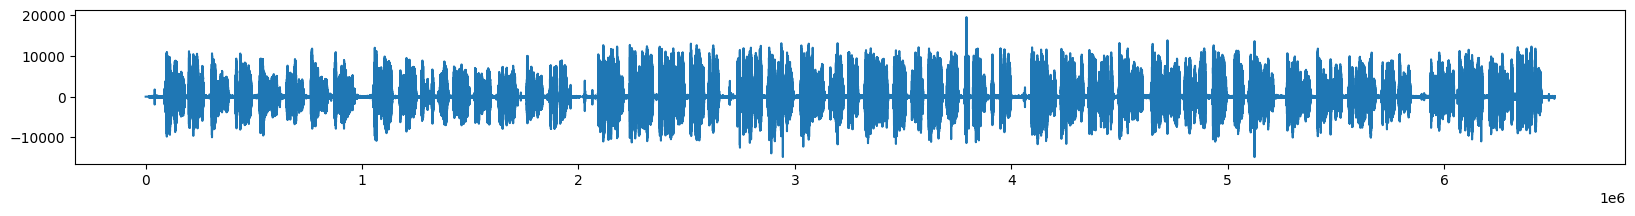

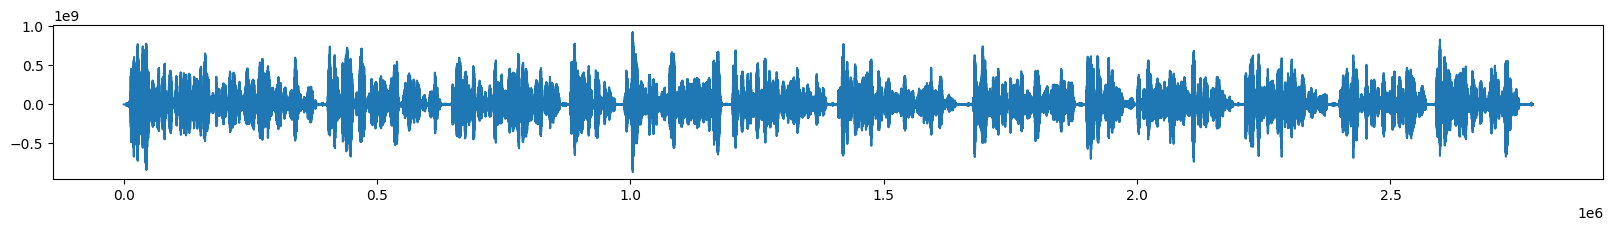

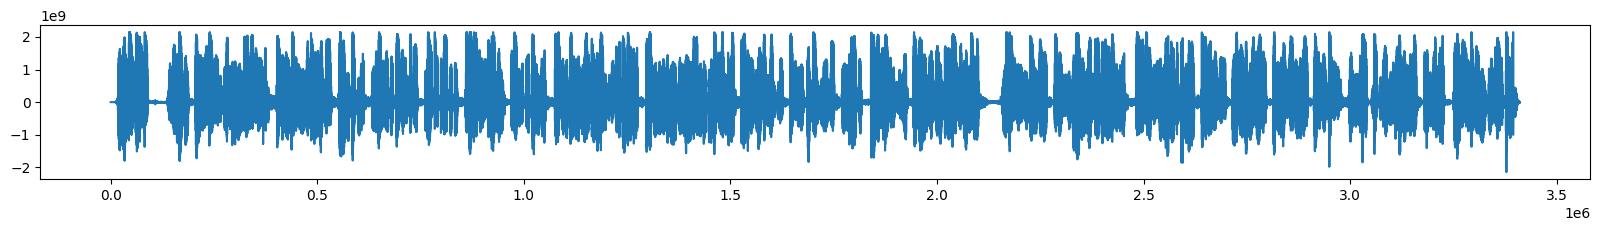

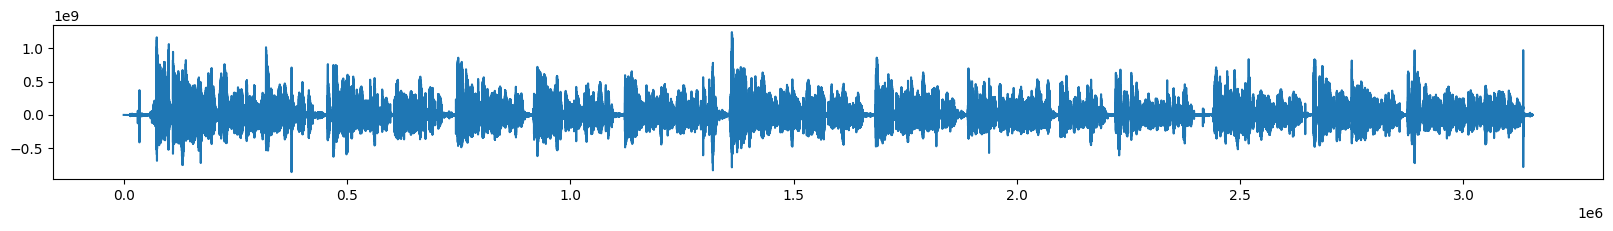

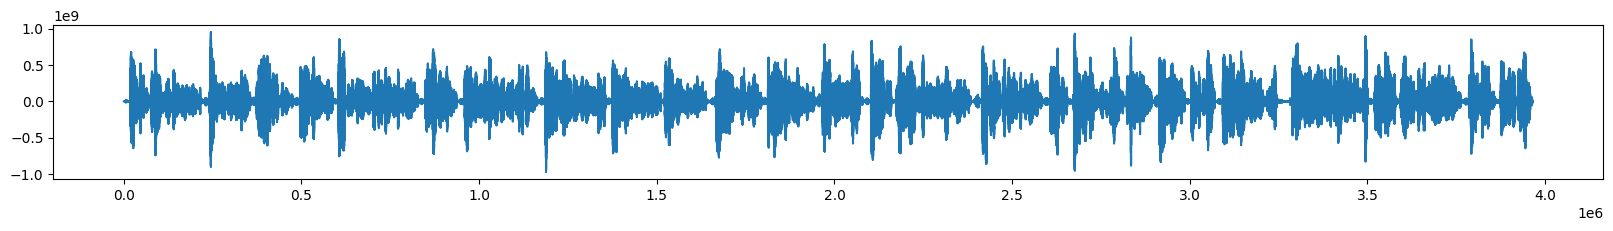

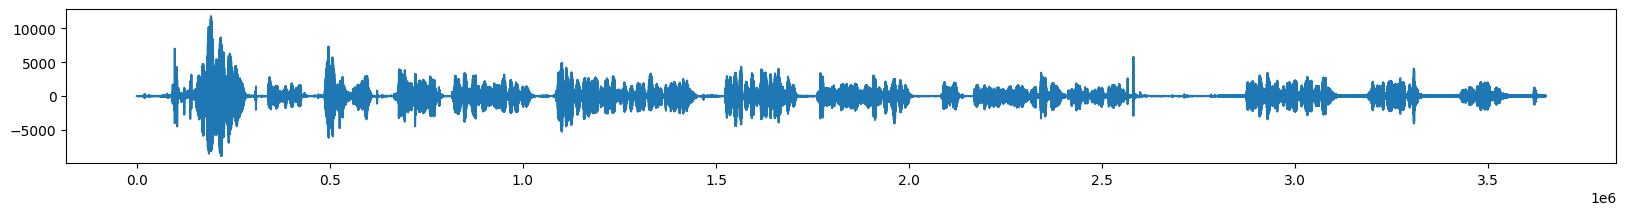

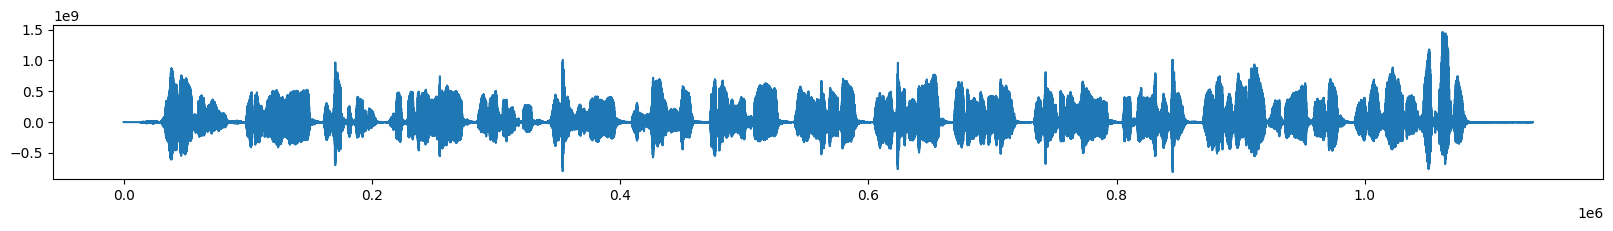

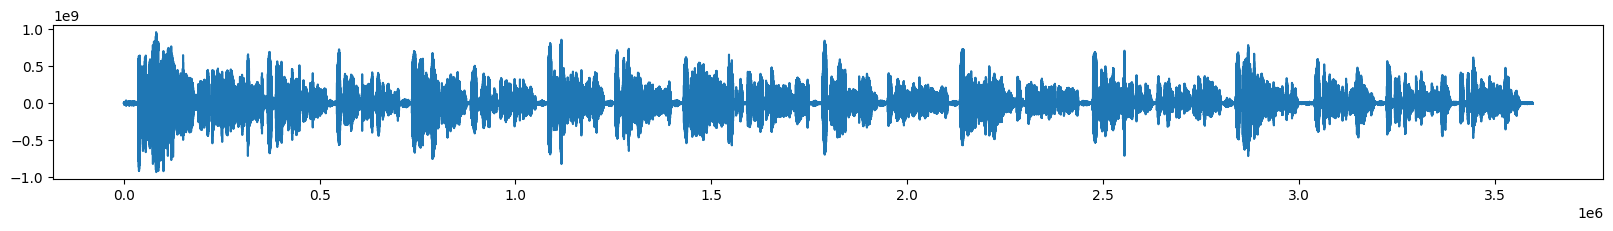

In [36]:
files = os.listdir("data")

for file in files:
    audio = pydub.AudioSegment.from_file(os.path.join("data", file))

    audio_array = audio.get_array_of_samples()
    plt.figure(figsize=(20, 2))
    plt.plot(audio_array)
    plt.show()

    chunks = pydub.silence.split_on_silence(audio, min_silence_len=2000, silence_thresh=-45)
    result = sum(chunks)
    file_name = file.split(".")[0]
    result.export("wav_data/"+file_name+".wav")

In [ ]:
for file in os.listdir("wav_data"):
    audio = pydub.AudioSegment.from_file(os.path.join("wav_data", file))

    person_name = file.split(".")[0]
    os.makedirs(os.path.join("dataset", person_name), exist_ok=True)

    chunks = pydub.utils.make_chunks(audio, 1000)
    for i, chunk in enumerate(chunks):
        if len(chunk) >= 1000:
            chunk.export(os.path.join("dataset", person_name, f"voice_{i}.wav"))